In [1]:
import os, pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings("ignore")

import evals.embed_evals as evals
import pickle
import utils
bm_y_train = np.array([0]*80+[1]*80)
bm_y_valid = np.array([0]*20+[1]*20)
import figs.plot_data as plot
import seaborn as sns

In [2]:
dwac_train = pickle.load(open("embeds/bm/dwac_train_emb10.merged10.pkl","rb"))
dwac_valid = pickle.load(open("embeds/bm/dwac_valid_emb10.merged10.pkl","rb"))
resn_train = pickle.load(open("embeds/bm/resn_train_emb10.pkl","rb"))
resn_valid = pickle.load(open("embeds/bm/resn_valid_emb10.pkl","rb"))
TN_train = pickle.load(open("embeds/bm/human/TN_train_emb10.pkl","rb"))
TN_valid = pickle.load(open("embeds/bm/human/TN_valid_emb10.pkl","rb"))
MTL_train = pickle.load(open("embeds/bm/human/MTL.BCETN_train_emb10.pkl","rb"))
MTL_valid = pickle.load(open("embeds/bm/human/MTL.BCETN_valid_emb10.pkl","rb"))

In [3]:
dwac = evals.bm_eval_human(dwac_train, dwac_valid)

{'train_triplet_acc': 0.6608391608391608, 'valid_triplet_acc': 0.6811594202898551, 'knn_acc': 0.85, 'knn_auc': 0.8500000000000001, 'human_1NN_align': 0.005, 'class_1NN': 0.525}


In [4]:
resn = evals.bm_eval_human(resn_train, resn_valid)

{'train_triplet_acc': 0.6748251748251748, 'valid_triplet_acc': 0.6956521739130435, 'knn_acc': 1.0, 'knn_auc': 1.0, 'human_1NN_align': 0.025, 'class_1NN': 0.65}


In [5]:
TN = evals.bm_eval_human(TN_train, TN_valid)

{'train_triplet_acc': 1.0, 'valid_triplet_acc': 0.8405797101449275, 'knn_acc': 0.85, 'knn_auc': 0.85, 'human_1NN_align': 1.0, 'class_1NN': 0.85}


In [6]:
MTL = evals.bm_eval_human(MTL_train, MTL_valid)

{'train_triplet_acc': 1.0, 'valid_triplet_acc': 0.8985507246376812, 'knn_acc': 0.95, 'knn_auc': 0.95, 'human_1NN_align': 0.075, 'class_1NN': 0.75}


In [7]:
marker_list = ['o','s','^','D','x','p','*','8']
def vis_clf_human(results, clf, human, xlabel, ylabel, legend, title=None, save=False, save_dir=None):
    plt.figure(figsize=(10, 6))

    for i, result in enumerate(results):
        plt.scatter(result[human],result[clf], s=300, marker=marker_list[i], label=legend[i])

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.legend(loc='upper right', bbox_to_anchor=(1, -0.11),fancybox=True, shadow=True, ncol=4)

    if title: plt.title(title,fontsize=30)
    if save:
        if not save_dir: save_dir = f"figs/out.pdf"
        plt.savefig(save_dir, format="pdf", bbox_inches="tight")


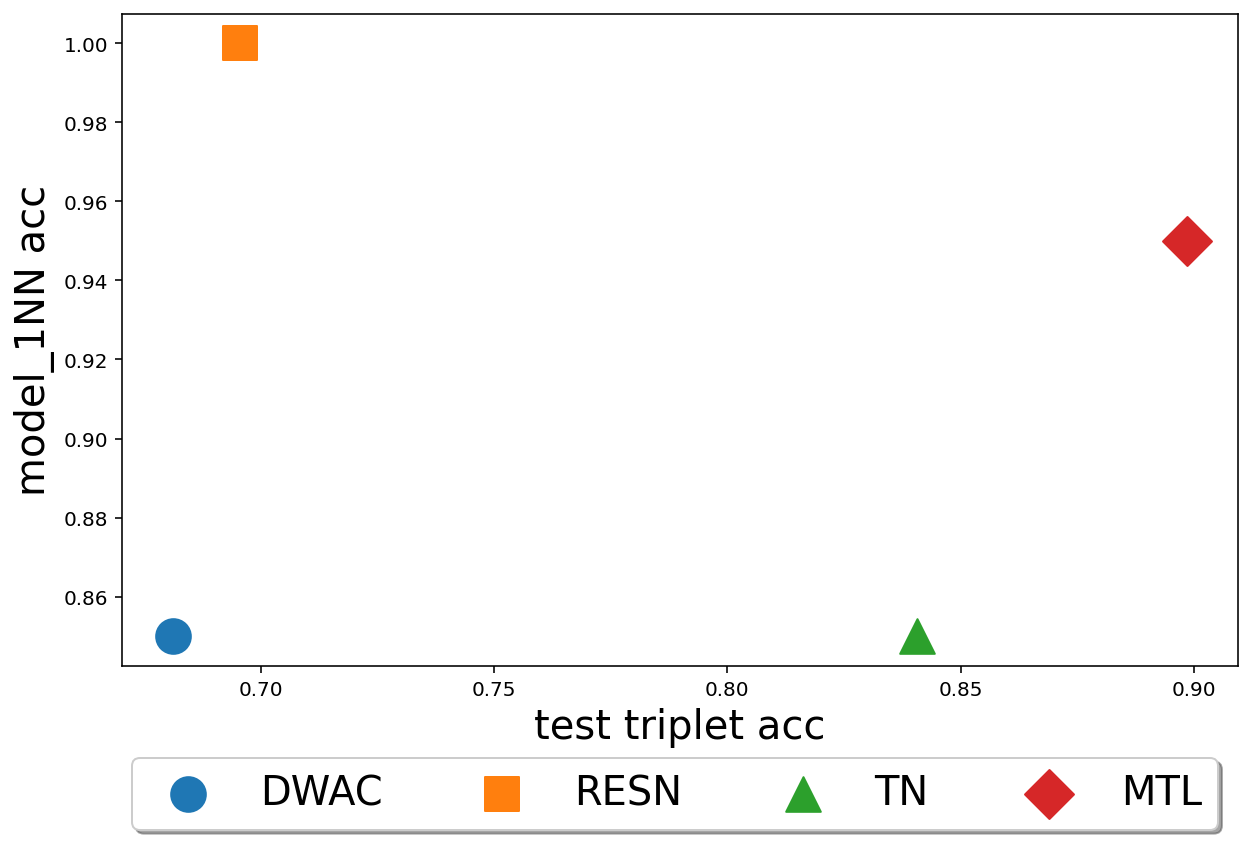

In [8]:
vis_clf_human([dwac, resn, TN,MTL], "knn_acc","valid_triplet_acc", 
"test triplet acc", "model_1NN acc", ["DWAC","RESN","TN","MTL"], 
save=False, save_dir="figs/test triplet acc vs. model_1NN acc.pdf")

TSNEing


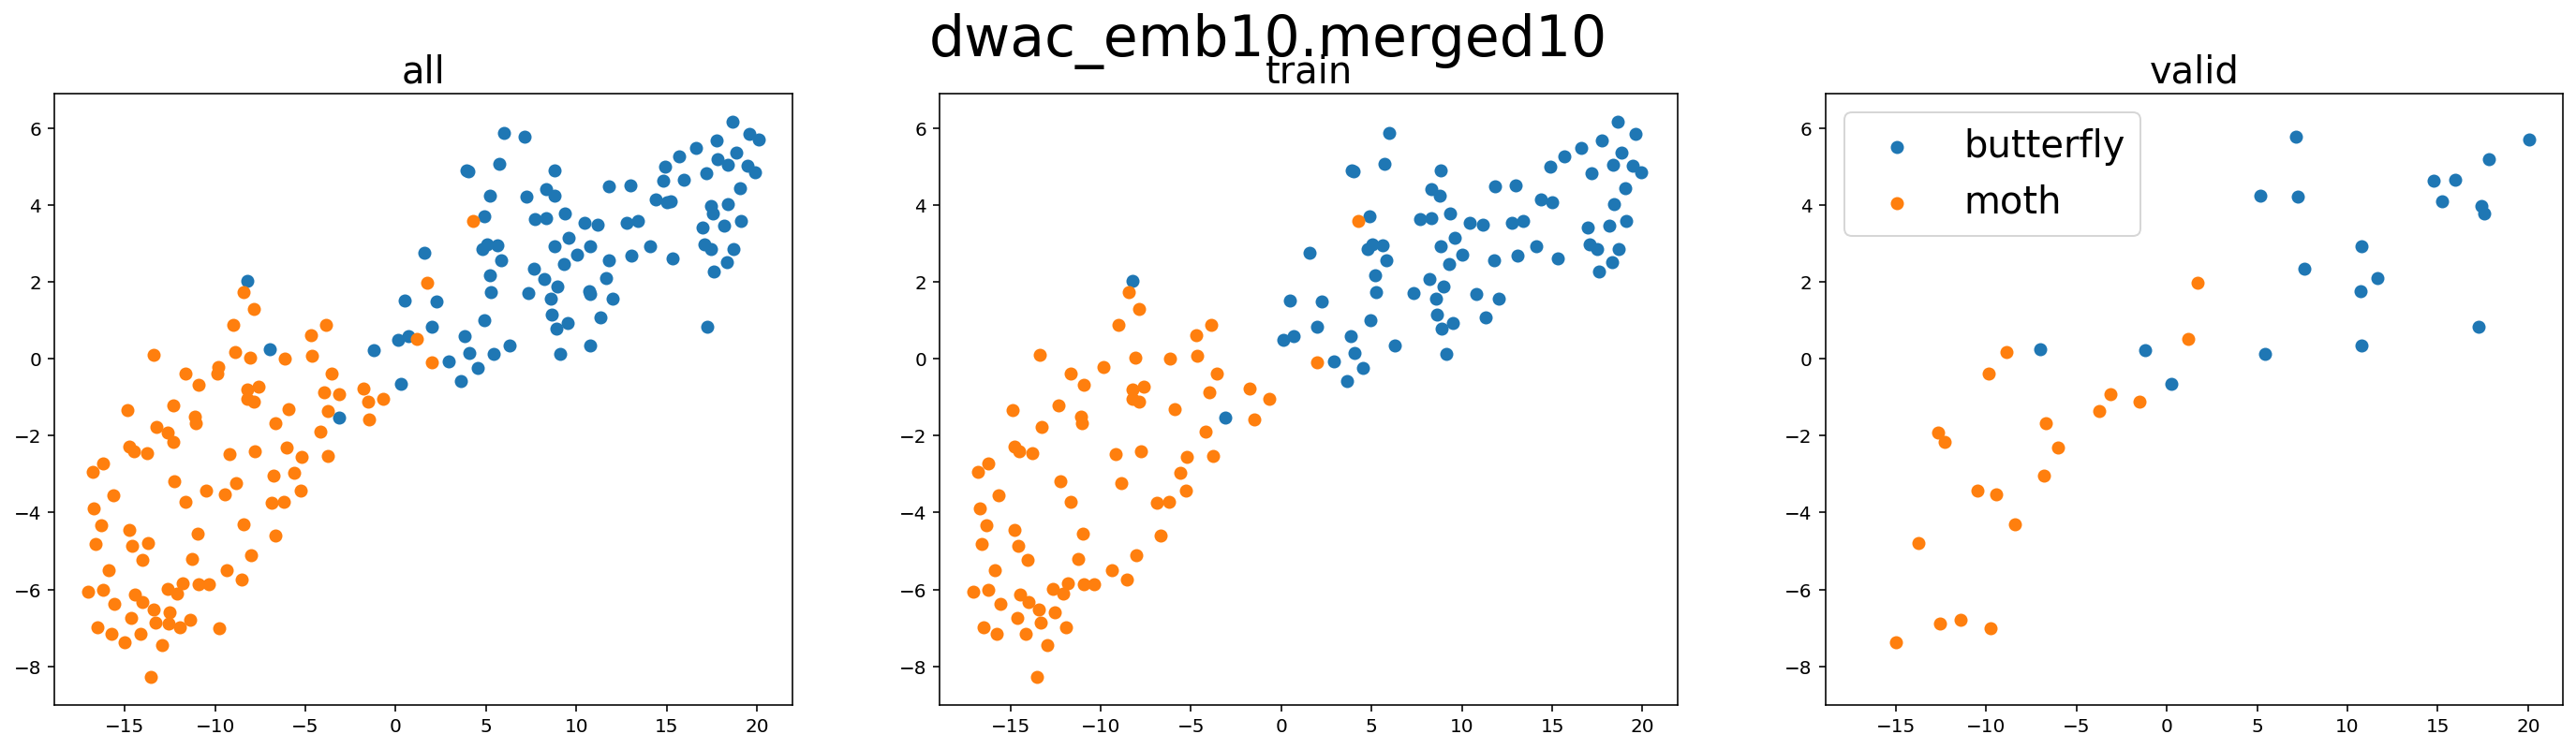

In [14]:
title = "dwac_emb10.merged10"
_ = plot.vis_all_data(dwac_train,y_train,dwac_valid,y_valid, 
title=title, legend=["butterfly","moth"], 
save=True, save_dir=f"figs/embeds/{title}.pdf")

TSNEing


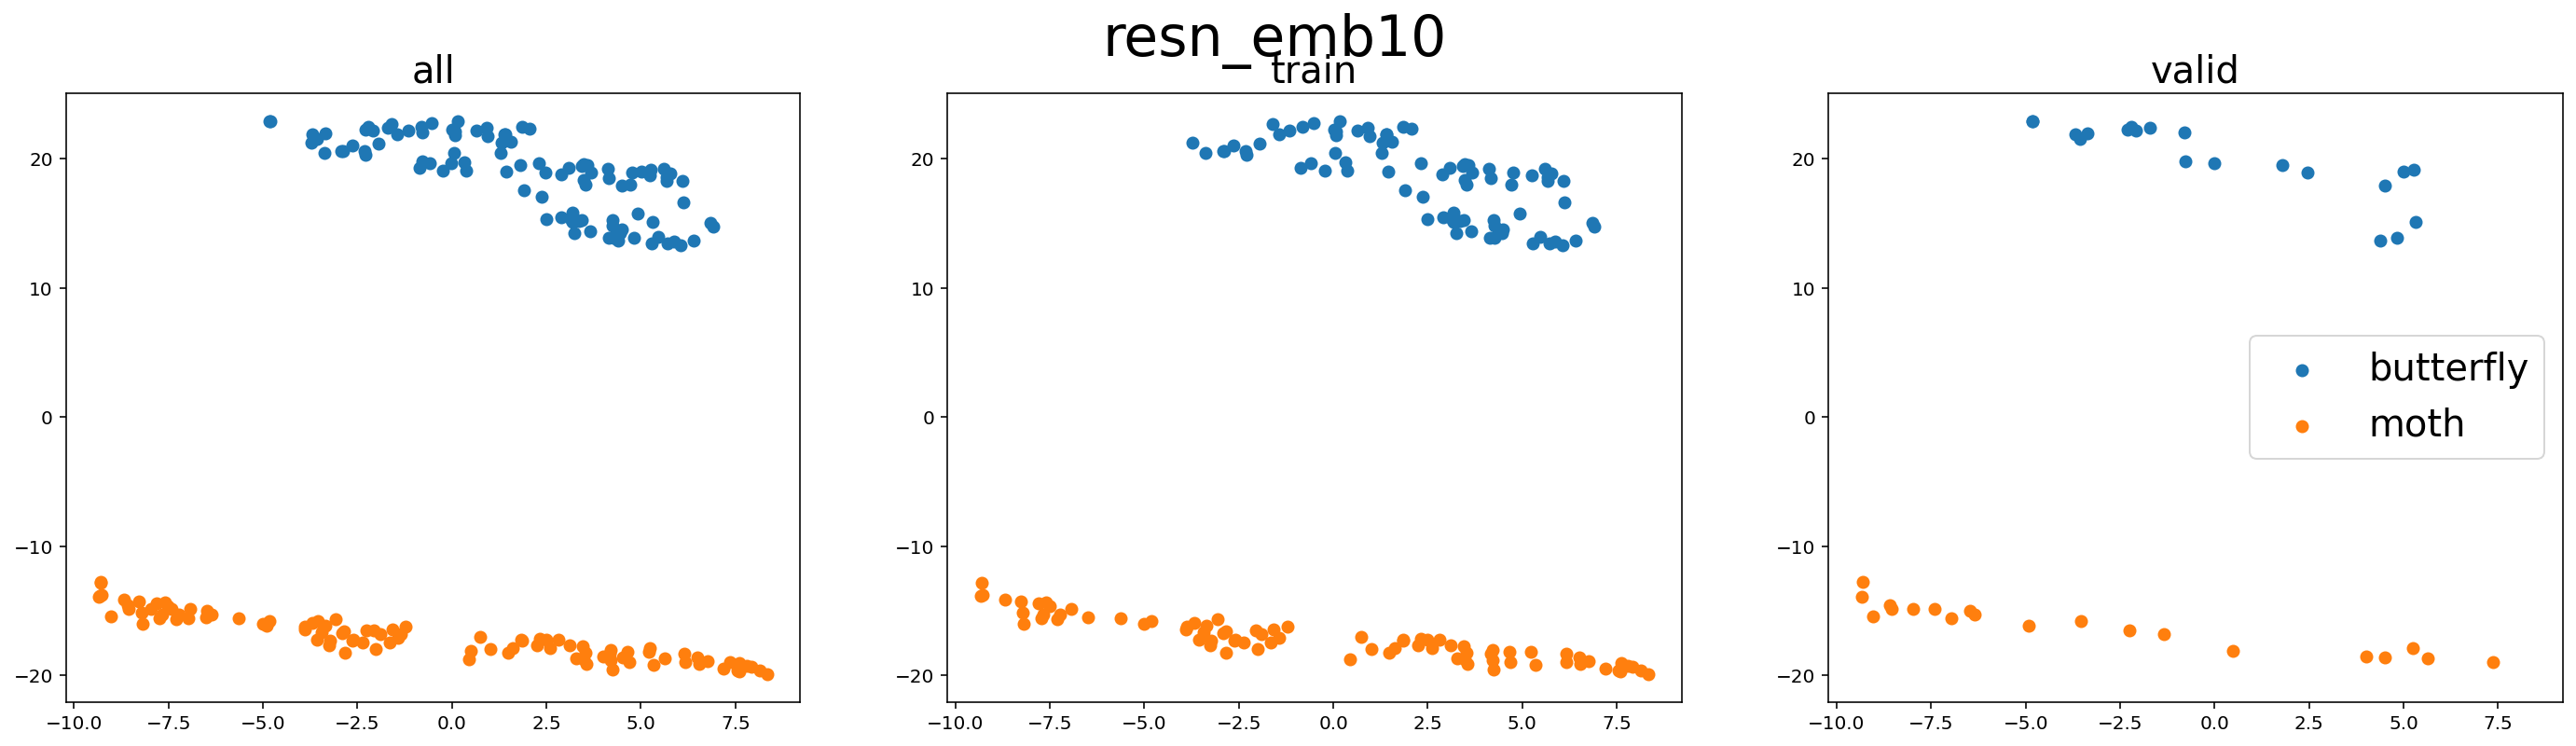

In [15]:
title = "resn_emb10"
_ = plot.vis_all_data(resn_train,y_train,resn_valid,y_valid, 
title, ["butterfly","moth"], 
save=True, save_dir=f"figs/embeds/{title}.pdf")

TSNEing


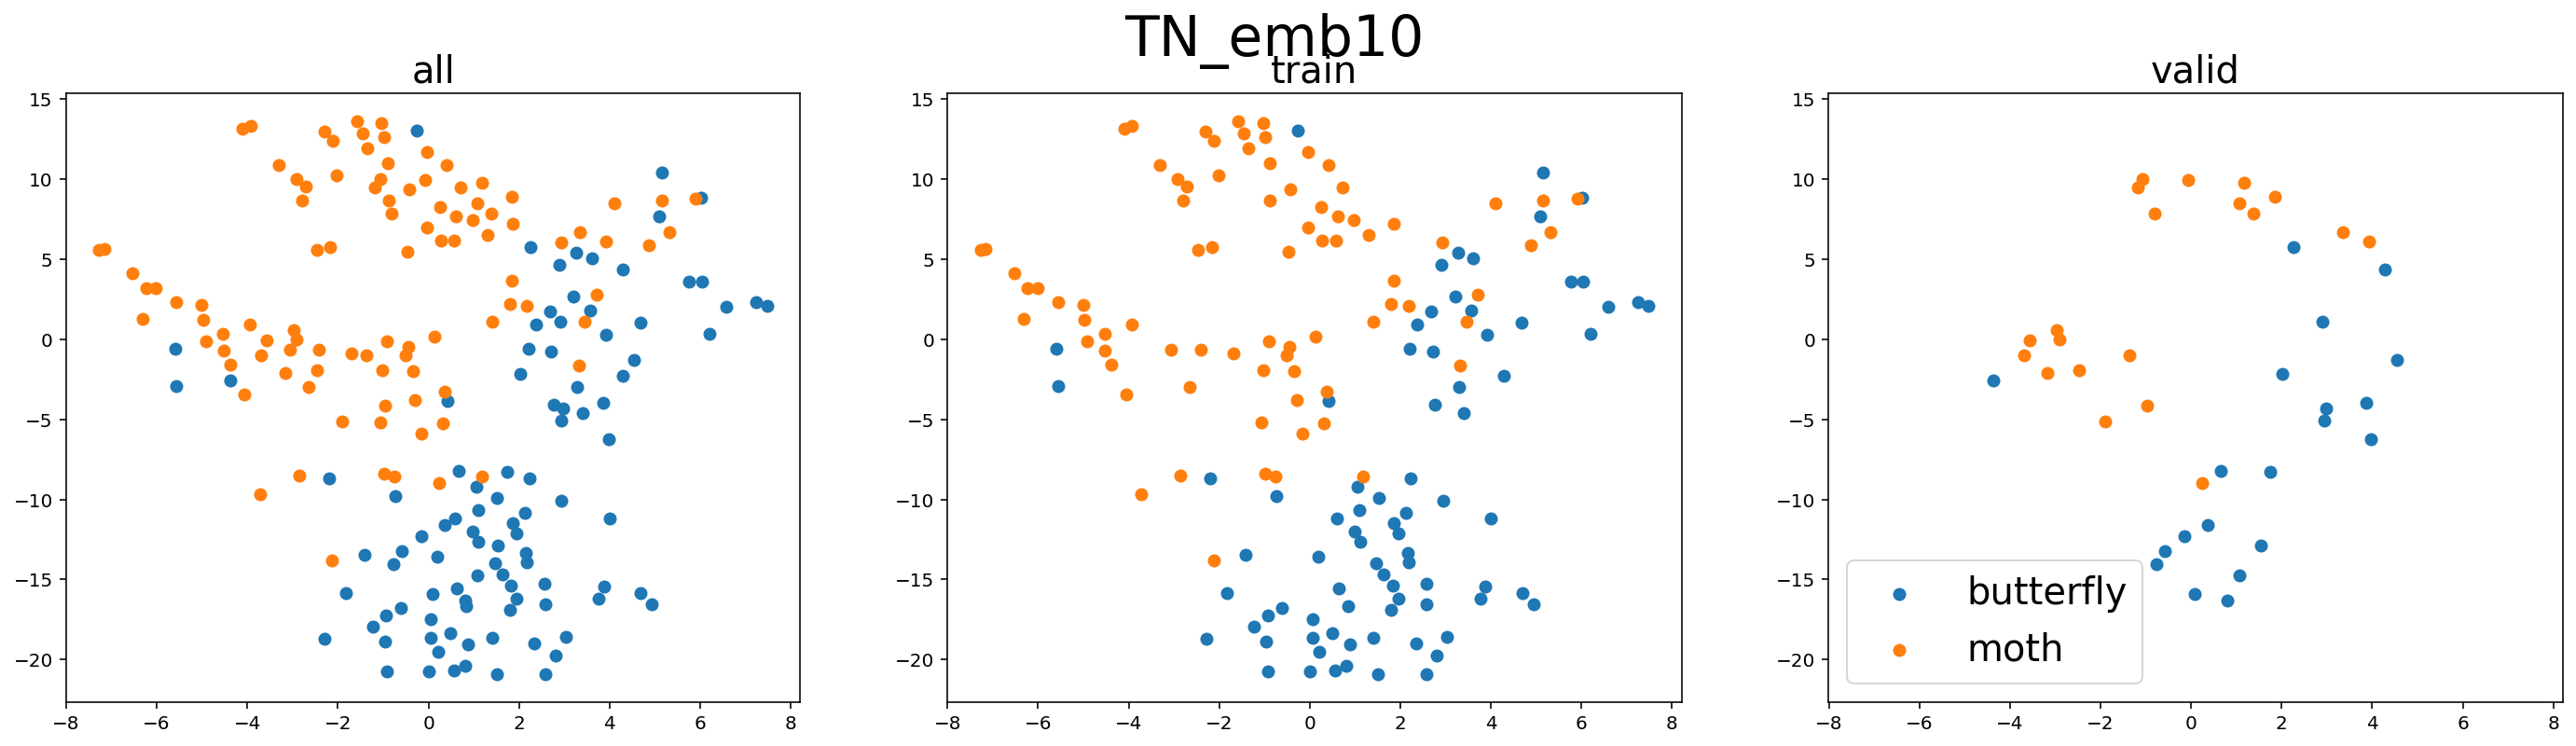

In [16]:
title = "TN_emb10"
_ = plot.vis_all_data(TN_train,y_train,TN_valid,y_valid, 
title, ["butterfly","moth"], 
save=True, save_dir=f"figs/embeds/{title}.pdf")

TSNEing


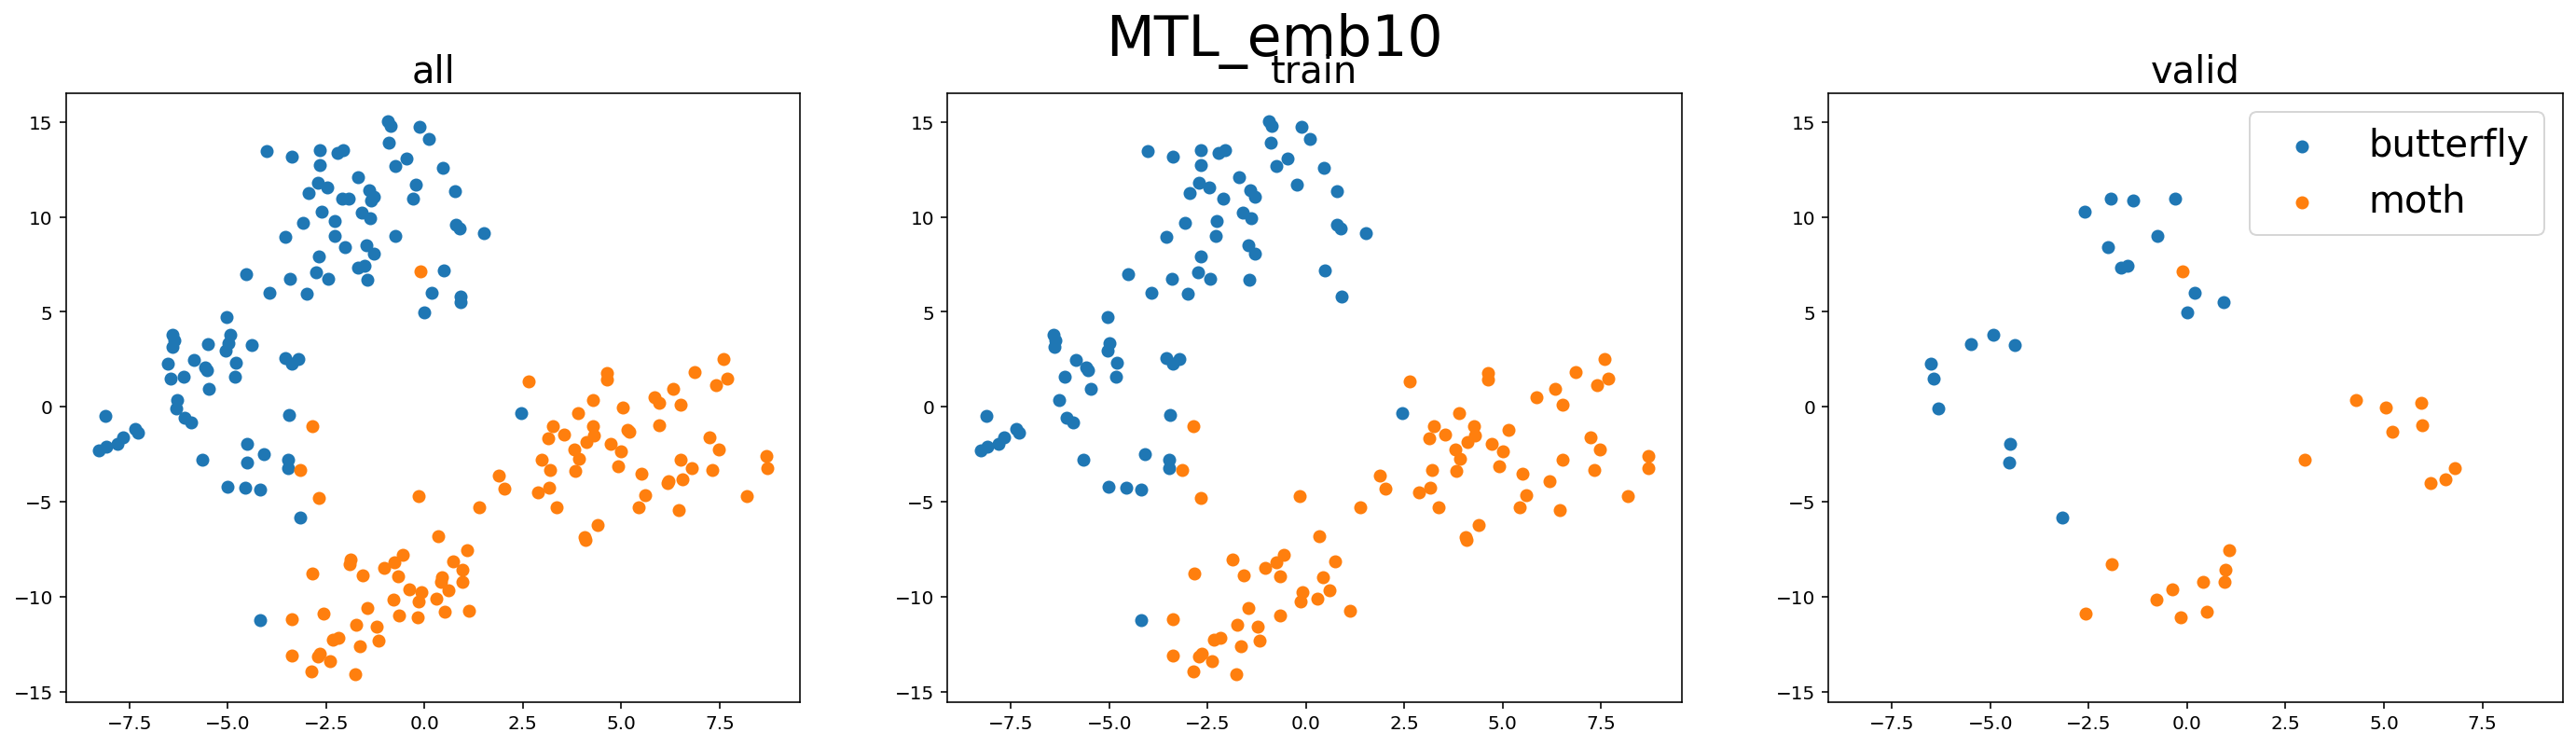

In [17]:
title = "MTL_emb10"
_ = plot.vis_all_data(MTL_train,y_train,MTL_valid,y_valid, 
title, ["butterfly","moth"], 
save=True, save_dir=f"figs/embeds/{title}.pdf")